In [30]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [26]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

Array of 60000 matrics of 28 * 28 integers

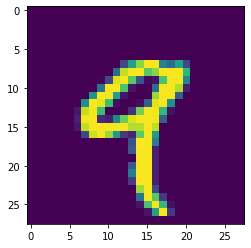

In [36]:
digit = train_img[4]
plt.imshow(digit)
plt.show()

### Tensor slicing

In [42]:
n_slice = train_img[10:100, :,:]
n_slice.shape

(90, 28, 28)

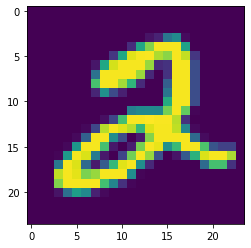

In [53]:
num = train_img[5, 2:-2,2:-2]
plt.imshow(num)
plt.show()

### Model initialization

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

### Pre processing
- Reshape 
- Scale to make values between 0 to 1


In [16]:
train_img = train_img.reshape((60000, 28*28))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000, 28*28))
test_img = test_img.astype('float32')/255

In [18]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

### Train the model

In [23]:
network.fit(train_img, train_label, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1032 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0679 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9887


In [24]:
test_loss, test_acc = network.evaluate(test_img, test_label)
print(test_loss, test_acc)

313/313 [==============================] - 0s 860us/step - loss: 0.0705 - accuracy: 0.9788
0.07051773369312286 0.9787999987602234
